In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Go to this URL in a browser: ******

Enter your authorization code:
··········
Mounted at /content/drive/


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [103]:
data_path='/content/drive/My Drive/Colab Notebooks/twcs.csv'
df=pd.read_csv(data_path)

In [ ]:
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
2507671,2677427,AppleSupport,False,Tue Oct 31 14:23:31 +0000 2017,@244392 Absolutely! We’ll be glad to see how w...,2677428,2677429.0
892456,991395,354848,True,Sun Oct 22 04:03:45 +0000 2017,@British_Airways will here be any disruptions ...,"991396,991394",NaN
636400,713019,290532,True,Tue Oct 10 22:12:05 +0000 2017,@AmericanAir how long will I have to wait befo...,713018,NaN
2421762,2590549,733753,True,Mon Oct 30 19:03:39 +0000 2017,@440556 @115817 My package is lost toooo. 😡,2590548,2590550.0
1949118,2104095,621197,True,Wed Nov 08 12:12:37 +0000 2017,Anyone who complains about the Wi-fi not worki...,"2104094,2104096,2104097,2104098,2104099,210410...",NaN


In [ ]:
df.shape

(2811774, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [ ]:
df.describe()

,tweet_id,in_response_to_tweet_id
count,3.000000e+05,2.151030e+05
mean,1.505174e+06,1.463445e+06
std,8.617408e+05,8.663743e+05
min,2.200000e+01,2.100000e+01
25%,7.618612e+05,7.186310e+05
50%,1.506126e+06,1.437173e+06
75%,2.252036e+06,2.219323e+06
max,2.987950e+06,2.987937e+06


In [ ]:
df.isnull().any()

tweet_id                   False
author_id                  False
inbound                    False
created_at                 False
text                       False
response_tweet_id           True
in_response_to_tweet_id     True
dtype: bool

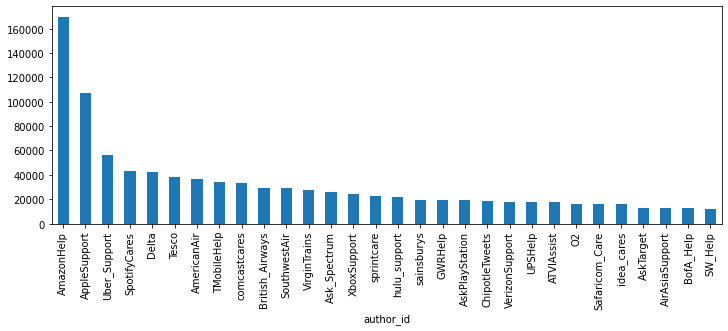

In [ ]:
plt.figure(figsize=(12,4))
df.groupby("author_id")["text"].count().sort_values(ascending=False).head(30).plot(kind="bar")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df["response_tweet_id"].isnull().sum()

1040629

In [ ]:
df["in_response_to_tweet_id"].isnull().sum()

794335

EDA

In [104]:
df_inbound=df[df["in_response_to_tweet_id"].isnull() & df["inbound"]==True]

In [ ]:
df_inbound.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN
25,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN


In [105]:
#Merged In out messages on the initial request
#match response tweets with the initial request
df_IO=pd.merge(df_inbound,df,left_on="tweet_id",right_on="in_response_to_tweet_id")

In [35]:
df_IO.head()

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0


In [ ]:
df_IO.inbound_y.value_counts()

False    794299
True      80993
Name: inbound_y, dtype: int64

In [36]:
df_IO[df_IO.inbound_y==True].head()

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
10,49,115721,True,Tue Oct 31 21:42:09 +0000 2017,@115722 tried to pay a bill for 60 days. No se...,48,NaN,48,115722,True,Tue Oct 31 21:49:31 +0000 2017,@115721 Are you referring to wireless or resid...,47,49.0
15,66,115728,True,Tue Oct 31 22:03:38 +0000 2017,@ChipotleTweets @28 \nI don't fit in my Veggie...,"64,67",NaN,67,115728,True,Tue Oct 31 22:29:16 +0000 2017,@ChipotleTweets @28 My baby https://t.co/dtiXx...,2174,66.0
21,156,115735,True,Mon Oct 23 03:19:06 +0000 2017,So frustrated with @ChipotleTweets 😡 Ordered d...,"155,157",NaN,155,115735,True,Tue Oct 31 22:00:46 +0000 2017,@ChipotleTweets Thank you @ChipotleTweets for ...,154,156.0
44,234,115762,True,Tue Oct 31 05:55:08 +0000 2017,@ATVIAssist i pre ordered wwii but how do i ge...,232,NaN,232,115762,True,Tue Oct 31 05:55:34 +0000 2017,@ATVIAssist For double xp^,"233,231",234.0
55,293,115769,True,Wed Oct 18 14:07:45 +0000 2017,Whoa! Come along with Lightroom’s own Ben Ward...,292,NaN,292,115779,True,Fri Oct 27 13:53:45 +0000 2017,@115769 I'm worried as if I update my LR6 stan...,291,293.0


In [106]:
#Filter only company replies from IO df
df_IO=df_IO[df_IO.inbound_y!=True]

In [ ]:
df_IO.head()

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0


Understanding the merged data

In [107]:
#Taking tweet_id 8 as an example
df_IO[df_IO.tweet_id_x==8]["text_x"]

0    @sprintcare is the worst customer service
1    @sprintcare is the worst customer service
2    @sprintcare is the worst customer service
Name: text_x, dtype: object

In [49]:
df_IO[df_IO.tweet_id_x==8]["response_tweet_id_x"][0].split(",")

['9', '6', '10']

In [64]:
#Support company name
df_IO[df_IO.tweet_id_x==8]["author_id_y"][0]

'sprintcare'

In [50]:
#This implies there are 3 enteries(/3 responses) for tweet_id 8, 
#Now checking the ids of the corresponding response tweets from customer support
response_tweetID=df_IO[df_IO.tweet_id_x==8]["response_tweet_id_x"][0].split(",")

In [65]:
#Messages from 'sprintcare' on tweet id 8 for author id 115712
list(df_IO[df_IO.tweet_id_y.isin(response_tweetID)]["text_y"])

['@115712 Can you please send us a private message, so that I can gain further details about your account?',
 '@115712 I would love the chance to review the account and provide assistance.',
 '@115712 Hello! We never like our customers to feel like they are not valued.']

Drop the Unwanted columns

In [108]:
required_col=["author_id_x","created_at_x","text_x","author_id_y","created_at_y","text_y"]

In [109]:
df_IO=df_IO[required_col]

In [68]:
df_IO.head()

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...
1,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...
2,115712,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...
3,115713,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...
4,115715,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",sprintcare,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...


In [69]:
df_IO.shape

(794299, 6)

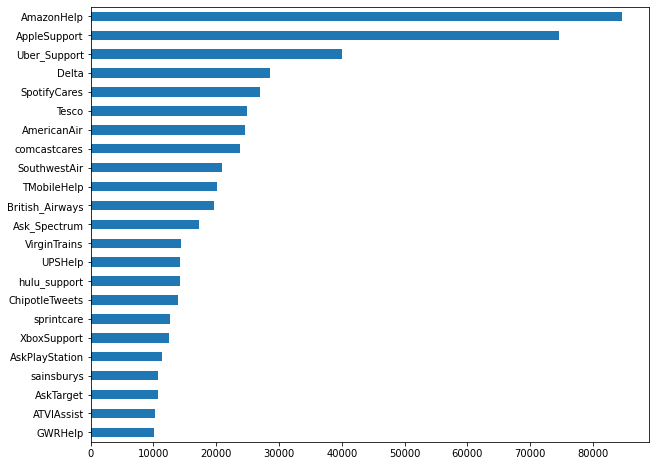

In [72]:
#Number of tweets in the dataset for each company and plot of data where number of tweets > 10000

temp = df_IO.groupby("author_id_y")["text_x"].count().sort_values()
c = temp[temp>10000].plot(kind='barh',figsize=(10, 8))
c.set_ylabel('')
plt.show()

Text Preprocessing of tweets 

In [110]:
from bs4 import BeautifulSoup
import string
import re

In [78]:
te=set(string.punctuation)
print(te)

{'>', '~', '*', '!', '.', ']', '`', '?', '(', '=', ')', '/', "'", '{', '}', '@', ';', '%', '<', ':', ',', '^', '\\', '&', '[', '+', '$', '#', '|', '-', '"', '_'}


In [111]:
url_pattern = re.compile(r'https?://\S+|www\.\S+')
html_pattern = re.compile('<.*?>')

def cleanText(text):
    text = html_pattern.sub(r'', text) #remove html content
    text = "".join([char for char in text if char not in string.punctuation]) # It will discard all punctuations
    text = url_pattern.sub(r'', text) #remove urls
    text = text.lower() #lowercase the words
    return text
df_IO['text_x'] = df_IO['text_x'].apply(cleanText)
df_IO['text_y'] = df_IO['text_y'].apply(cleanText)

In [95]:
df_IO.head()

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer service,sprintcare,Tue Oct 31 21:46:24 +0000 2017,115712 please send us private message gain det...
1,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,115712 would love chance review account provid...
2,115712,Tue Oct 31 21:45:10 +0000 2017,sprintcare worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,115712 hello never like customers feel like va...
3,115713,Tue Oct 31 19:56:01 +0000 2017,115714 y’all lie “great” connection 5 bars lte...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,115713 h wed definitely like work long experie...
4,115715,Tue Oct 31 22:03:34 +0000 2017,115714 whenever contact customer support tell ...,sprintcare,Tue Oct 31 22:10:10 +0000 2017,115715 please send private message send link a...


In [112]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [113]:
#Remove stopwords 
STOPWORDS = set(nltk.corpus.stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_IO['text_x'] = df_IO['text_x'].apply(remove_stopwords)
df_IO['text_y'] = df_IO['text_y'].apply(remove_stopwords)

In [114]:
#Lemmatize the text words(roots will remain intact)
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df_IO['text_x'] = df_IO['text_x'].apply(lemmatize_words)
df_IO['text_y'] = df_IO['text_y'].apply(lemmatize_words)

In [118]:
df_IO.head()

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,worst customer service,sprintcare,Tue Oct 31 21:46:24 +0000 2017,please send u private message gain detail acc...
1,115712,Tue Oct 31 21:45:10 +0000 2017,worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,would love chance review account provide assi...
2,115712,Tue Oct 31 21:45:10 +0000 2017,worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,hello never like customer feel like valued
3,115713,Tue Oct 31 19:56:01 +0000 2017,y’all lie “great” connection bar lte still w...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,h wed definitely like work long experiencing ...
4,115715,Tue Oct 31 22:03:34 +0000 2017,whenever contact customer support tell shortc...,sprintcare,Tue Oct 31 22:10:10 +0000 2017,please send private message send link access ...


In [117]:
#Since finding the topics and sentiment from text/tweet has nothing to do with author id in the text, we are removing it from the tweets
companies = df_IO['author_id_y'].unique()
#Remove consumer ids
df_IO['text_x'] = df_IO['text_x'].str.replace('\d+', '')
df_IO['text_y'] = df_IO['text_y'].str.replace('\d+', '')
#Remove company ids
df_IO['text_x'] = df_IO['text_x'].str.replace('|'.join(companies), '')
df_IO['text_y'] = df_IO['text_y'].str.replace('|'.join(companies), '')

Finding topics from tweets

In [119]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument

In [120]:
train_data=df_IO["text_x"]

In [122]:
train_data.drop_duplicates(inplace=True)
train_data.duplicated().any()

False

In [125]:
train_data=pd.DataFrame(train_data)
train_data.head()
train_data=list(train_data['text_x'])

In [126]:
train_data[:5]

[' worst customer service',
 ' y’all lie “great” connection  bar lte still won’t load something smh',
 ' whenever contact customer support tell shortcode enabled account never  year ive tried httpstcogrtnxpk',
 'actually thats broken link sent incorrect information httpstcovyfrhrvi',
 'yo askspectrum customer service rep super nice— imma start trippin y’all don’t get service going']

In [128]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [129]:
tagged_data = [TaggedDocument(words=nltk.word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(train_data)]

In [133]:
tagged_data[3]

TaggedDocument(words=['actually', 'thats', 'broken', 'link', 'sent', 'incorrect', 'information', 'httpstcovyfrhrvi'], tags=['3'])

In [134]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [136]:
tagged_data=pd.Series(tagged_data)

In [137]:
tagged_data.values

array([TaggedDocument(words=['worst', 'customer', 'service'], tags=['0']),
       TaggedDocument(words=['y', '’', 'all', 'lie', '“', 'great', '”', 'connection', 'bar', 'lte', 'still', 'won', '’', 't', 'load', 'something', 'smh'], tags=['1']),
       TaggedDocument(words=['whenever', 'contact', 'customer', 'support', 'tell', 'shortcode', 'enabled', 'account', 'never', 'year', 'ive', 'tried', 'httpstcogrtnxpk'], tags=['2']),
       ...,
       TaggedDocument(words=['virgintrains', 'hope', 'well', 'am', 'train', 'crewe', 'euston', 'class', 'peak', 'offpeak', 'thanks'], tags=['726578']),
       TaggedDocument(words=['wtf', 'i', '’', 've', 'really', 'shitty', 'service', 'day', 'get', 'shit', 'together'], tags=['726579']),
       TaggedDocument(words=['aldiuk', 'warm', 'sloe', 'gin', 'mince', 'pie', 'ice', 'cream', 'best', 'thing', 'ever', 'notjustxmasallyearround'], tags=['726580'])],
      dtype=object)

In [139]:
#Doc2Vec approach
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(tagged_data.values)])

100%|██████████| 726581/726581 [00:00<00:00, 2542281.60it/s]


In [140]:
%%time
for epoch in range(20):
    print("epoch "+str(epoch))
    model_dbow.train(tagged_data.values, total_examples=len(tagged_data.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha
#model.save('twitter_topic_analysis.model')

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19


NameError: ignored

In [142]:
model_dbow.save("d2v.model")
print("Model Saved")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Model Saved


In [144]:
vectors = []

print("inferring vectors")
duplicate_dict = {}
used_lines = []
for i, t in enumerate(train_data):
    if i % 2 == 0 and t not in duplicate_dict:
        duplicate_dict[t] = True
        used_lines.append(t)
        vectors.append(model_dbow.infer_vector(nltk.word_tokenize(t)))


inferring vectors


In [145]:
vectors[0]

array([-4.74791527e-02, -7.31063774e-03, -3.29174008e-03, -5.13739139e-03,
       -6.18215837e-02, -5.31510338e-02,  1.10428393e-01, -8.55510831e-02,
       -4.30069976e-02,  5.49566522e-02, -2.71392837e-02, -5.74410744e-02,
       -2.53000762e-04, -8.55225921e-02,  6.27142610e-03, -5.88938631e-02,
       -8.52021948e-03,  5.72120659e-02,  1.65866166e-02, -1.72481239e-02,
        3.29730734e-02,  3.01481504e-02,  4.14362997e-02, -1.66827776e-02,
        5.25217429e-02,  1.02846973e-01,  8.76718611e-02,  6.28618002e-02,
       -3.61549705e-02, -5.61861023e-02, -6.73916042e-02,  6.65860251e-03,
        3.31459893e-03,  2.29663644e-02,  3.07500977e-02, -3.41181383e-02,
       -2.52530146e-02, -7.89728239e-02,  7.77454078e-02,  1.76886953e-02,
        8.21054354e-02, -3.41725051e-02, -5.92529848e-02, -1.28060635e-02,
       -1.13162450e-01,  7.85257965e-02, -8.59513730e-02,  1.02413883e-02,
        4.09174338e-02,  2.05089822e-02, -1.01287812e-01,  3.88739407e-02,
        1.04579240e-01,  

In [150]:
#LDA approach
lda_data=pd.DataFrame(train_data,columns=["Customer tweet"])

In [151]:
lda_data['index'] = lda_data.index
documents = lda_data

In [152]:
print(len(documents))
print(documents[:5])

726581
                                      Customer tweet  index
0                             worst customer service      0
1   y’all lie “great” connection  bar lte still w...      1
2   whenever contact customer support tell shortc...      2
3  actually thats broken link sent incorrect info...      3
4  yo askspectrum customer service rep super nice...      4


In [153]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

In [154]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['', 'doesnt', '', 'carry', 'oann', 'tell', 'call', '', 'ask', 'please', 'dm', 'thanks', 'httpstcouuhhvxxv']


 tokenized and lemmatized document: 
['doesnt', 'carry', 'oann', 'tell', 'thanks']


In [155]:
processed_docs = documents['Customer tweet'].map(preprocess)
processed_docs[:10]

0                           [worst, customer, service]
1                            [great, connection, load]
2    [contact, customer, support, tell, shortcode, ...
3    [actually, thats, broken, link, sent, incorrec...
4    [askspectrum, customer, service, super, nice, ...
5                [picture, askspectrum, pretty, month]
6    [somebody, verizonsupport, help, meeeeee, wors...
7    [verizonsupport, friend, internet, need, play,...
8                                              [worst]
9     [verizonsupport, gtall, verizon, downlt, expect]
Name: Customer tweet, dtype: object

In [156]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 customer
1 service
2 worst
3 connection
4 great
5 load
6 account
7 contact
8 enabled
9 httpstcogrtnxpk
10 shortcode


In [157]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [158]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(10, 1), (300, 1), (580, 1), (665, 1)]

In [159]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 10 ("tell") appears 1 time.
Word 300 ("thanks") appears 1 time.
Word 580 ("doesnt") appears 1 time.
Word 665 ("carry") appears 1 time.


In [160]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.518394030928141), (1, 0.4490495779578608), (2, 0.7277514034572112)]


In [161]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [162]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.037*"chipotletweets" + 0.020*"safaricomcare" + 0.010*"line" + 0.009*"case" + 0.009*"greggsofficial" + 0.009*"chicken" + 0.008*"askebay" + 0.008*"data" + 0.008*"chipotle" + 0.007*"kindly"
Topic: 1 
Words: 0.034*"game" + 0.025*"xboxsupport" + 0.019*"live" + 0.019*"watch" + 0.018*"xbox" + 0.017*"hulusupport" + 0.017*"atviassist" + 0.012*"available" + 0.012*"play" + 0.010*"hulu"
Topic: 2 
Words: 0.034*"tesco" + 0.029*"store" + 0.019*"free" + 0.018*"bought" + 0.017*"christmas" + 0.016*"year" + 0.015*"price" + 0.013*"aldiuk" + 0.012*"offer" + 0.011*"morrison"
Topic: 3 
Words: 0.083*"service" + 0.059*"customer" + 0.026*"internet" + 0.016*"time" + 0.015*"worst" + 0.014*"askspectrum" + 0.013*"phone" + 0.010*"company" + 0.010*"month" + 0.009*"care"
Topic: 4 
Words: 0.035*"driver" + 0.022*"ubersupport" + 0.017*"charged" + 0.016*"money" + 0.015*"uber" + 0.015*"card" + 0.015*"minute" + 0.013*"time" + 0.013*"charge" + 0.013*"ride"
Topic: 5 
Words: 0.049*"order" + 0.037*"delivery" 

In [167]:
lda_model.print_topic(0)

'0.037*"chipotletweets" + 0.020*"safaricomcare" + 0.010*"line" + 0.009*"case" + 0.009*"greggsofficial" + 0.009*"chicken" + 0.008*"askebay" + 0.008*"data" + 0.008*"chipotle" + 0.007*"kindly"'

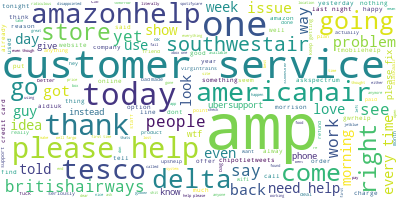

In [168]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_IO['text_x'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

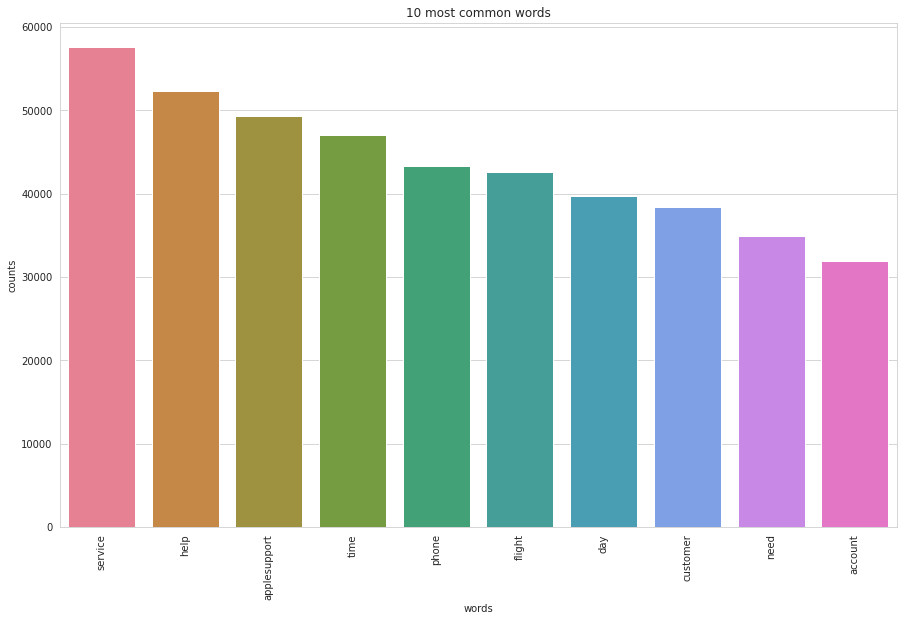

In [169]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer

sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_IO['text_x'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)


Sentiment analyzer using nltk's SentimentIntensityAnalyzer

In [171]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [173]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [174]:
# Instantiate sentiment analyzer from NLTK, make helper function
sentiment_analyzer = SentimentIntensityAnalyzer()

def sentiment_for(text: str) -> float:
    return sentiment_analyzer.polarity_scores(text)['compound']

sentiment_for('I love it!')

0.6696

In [175]:
# Analyze sentiment of inbound customer support requests
df_IO['inbound_sentiment'] = df_IO.text_x.progress_apply(sentiment_for)

progress-bar: 100%|██████████| 726581/726581 [02:08<00:00, 5642.18it/s]


In [178]:
author_grouped = df_IO.groupby('author_id_y')
top_support_providers = set(author_grouped.agg('count')
                                .sort_values(['text_x'], ascending=[0])
                                .index[:20]
                                .values)

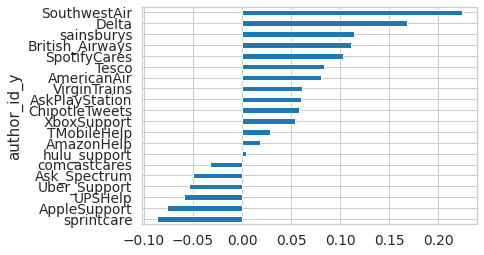

In [183]:
#Graph based on sentiment 
df_IO.loc[df_IO.author_id_y.isin(top_support_providers)].groupby('author_id_y').inbound_sentiment.mean().sort_values().plot(kind='barh')

In [ ]:
df_IO[df_IO['inbound_sentiment']<0.5].count()